In [ ]:
# Install diffprivlib if not installed
!pip install diffprivlib

import pandas as pd
import numpy as np
import random
from diffprivlib.mechanisms import Laplace

# Load dataset
df = pd.read_csv("bank_add_full.csv")

# Convert 'personal loan' column: "yes" → 1, "no" → 0
df["loan"] = df["loan"].map({"yes": 1, "no": 0})


# Select the column to apply randomized response
select_col1 = df["loan"]


def diff_privacy(data):

    # Initialize randomized response counters
    yescount = 0
    nocount = 0
    
    # Apply the Coin Flip Randomized Response
    for value in data:
        coin1 = random.randint(1, 2)  # Heads = 1, Tails = 2
        
        if coin1 == 2:  # Tails → Respond truthfully
            if value == 1:  # Original answer was "yes"
                yescount += 1
            else:
                nocount += 1
        else:  # Heads → Flip again and randomize response
            coin2 = random.randint(1, 2)
            if coin2 == 1:
                yescount += 1  # Force "yes"
            else:
                nocount += 1  # Force "no"
    
    # Calculate the observed noisy proportion
    yes_proportion = yescount / (yescount + nocount)
    
    # Estimate the true fraction of people with property P
    estimated_p = 2 * (yes_proportion - 0.25)
    estimated_p = max(0, min(1, estimated_p))  # Ensure it's in range [0,1]

    return yes_proportion, yescount, nocount, estimated_p



def randomized_diff_privacy(data, N_iter): 
    '''
    Randomized differential privacy process.
    Input: data column, N_iter number of iterations
    Output: average of output variables from diff_privacy (yes_proportion, yescount, nocount, estimated_p) for N_iter
    '''
    #initialize variables as zero
    Yes_proportion = 0
    Yescount = 0
    Nocount= 0
    Estimated_p = 0

    #repeat computation N_iter times, adding the outputs
    for _ in range(N_iter):
        yes_proportion, yescount, nocount, estimated_p = diff_privacy(data)
        Yes_proportion += yes_proportion
        Yescount += yescount
        Nocount += nocount
        Estimated_p += estimated_p

    #return averages
    return Yes_proportion/N_iter, Yescount/N_iter, Nocount/N_iter, Estimated_p/N_iter


Yes_proportion, Yescount, Nocount, Estimated_p = randomized_diff_privacy(select_col1, 100)

# Display results
print(f"Randomized Yes Count: {Yescount}")
print(f"Randomized No Count: {Nocount}")
print(f"Observed Proportion (Noisy): {Yes_proportion:.3f}")
print(f"Estimated True Proportion: {Estimated_p:.3f}")


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ahmed\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Randomized Yes Count: 13414.1
Randomized No Count: 27773.9
Observed Proportion (Noisy): 0.326
Estimated True Proportion: 0.151


In [7]:
Yes = []
No = []
Est_p = []

for N_iter in np.arange(50, 501, 50):
    Yes_proportion, Yescount, Nocount, Estimated_p = randomized_diff_privacy(select_col1, N_iter)
    Yes.append(Yes_proportion)
    

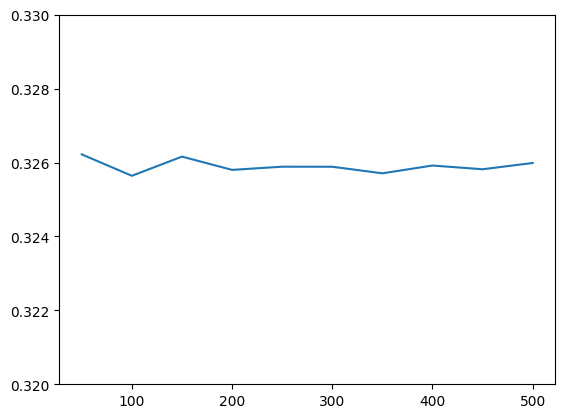

In [10]:
import matplotlib.pyplot as plt
plt.ylim(ymin = 0.32, ymax=0.33)
plt.plot(np.arange(50, 501, 50), Yes);

In [11]:
import pandas as pd
import numpy as np
import random

# Load dataset
df = pd.read_csv("bank_add_full.csv")

# Convert 'housing' column: "yes" → 1, "no" → 0
df["housing"] = df["housing"].map({"yes": 1, "no": 0})

# Select the column to apply randomized response
select_col2 = df["housing"]  # Now using select_col2 instead of select_col1

# Initialize randomized response counters
yescount = 0
nocount = 0

# Apply the Coin Flip Randomized Response
for value in select_col2:
    coin1 = random.randint(1, 2)  # Heads = 1, Tails = 2
    
    if coin1 == 2:  # Tails → Respond truthfully
        if value == 1:  # Original answer was "yes"
            yescount += 1
        else:
            nocount += 1
    else:  # Heads → Flip again and randomize response
        coin2 = random.randint(1, 2)
        if coin2 == 1:
            yescount += 1  # Force "yes"
        else:
            nocount += 1  # Force "no"

# Prevent division by zero
total_count = yescount + nocount
if total_count == 0:
    yes_proportion = 0  # Avoid division error
else:
    yes_proportion = yescount / total_count  # Calculate observed noisy proportion

# Estimate the true fraction of people with property P
estimated_p = 2 * (yes_proportion - 0.25)
estimated_p = max(0, min(1, estimated_p))  # Ensure it's in range [0,1]

# Display results
print(f"Randomized Yes Count: {yescount}")
print(f"Randomized No Count: {nocount}")
print(f"Observed Proportion (Noisy): {yes_proportion:.3f}")
print(f"Estimated True Proportion: {estimated_p:.3f}")

# Apply the Laplace Mechanism for Differential Privacy
sensitivity = 1 / len(df)  # Sensitivity calculation (1 change per participant)
epsilon = 1.0  # Privacy budget
noise_scale = sensitivity / epsilon

# Generate Laplace noise
laplace_noise = np.random.laplace(0, noise_scale)

# Apply noise to the estimated proportion
laplace_mechanism = estimated_p + laplace_noise
laplace_mechanism = max(0, min(1, laplace_mechanism))  # Keep in range [0,1]

# Display DP results
print(f"Noisy Proportion with Laplace Mechanism: {laplace_mechanism:.3f}")

# Show first few rows of the housing column
print(df[["housing"]].head())


Randomized Yes Count: 21004
Randomized No Count: 20184
Observed Proportion (Noisy): 0.510
Estimated True Proportion: 0.520
Noisy Proportion with Laplace Mechanism: 0.520
   housing
0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
